# Face Detection

# 01. Face Detection in images

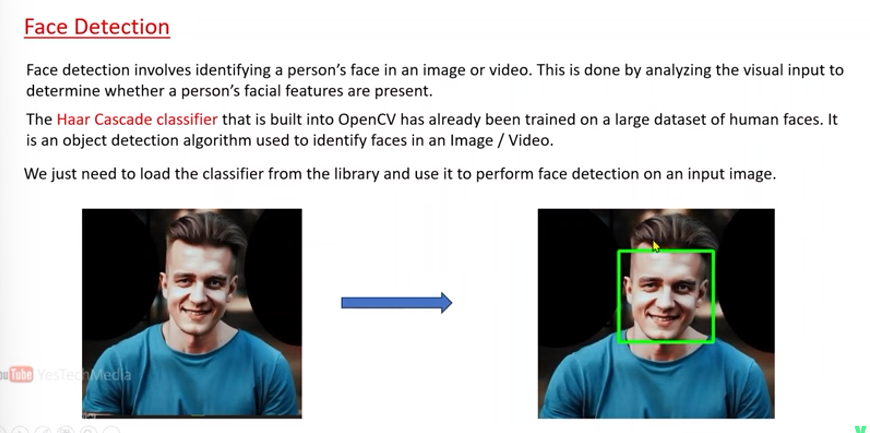

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Step 01 : Load pre-trained Haar Cascade Classifier for frontal face detection

In [22]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

### Step 01 : import image 

In [31]:
girl_image = cv.imread('Green_eyed_girl.jpeg')

In [32]:
cv.imshow("face", girl_image)
cv.waitKey(0)
cv.destroyAllWindows()

### Step 01 : convert to gray image

In [33]:
girl_gray_image = cv.cvtColor(girl_image, cv.COLOR_BGR2GRAY)

### Step 01 : Face detection

In [34]:
girl_face = face_cascade.detectMultiScale(
    image=girl_gray_image,
    scaleFactor=1.4,   # best value ---> 1.1 - 1.5
    minNeighbors=4     # 3-5
) 

In [35]:
print(girl_face)

[[155 119 253 253]]


In [37]:
for x, y, width, height in girl_face:
    cv.rectangle(girl_image, pt1=(x,y), pt2=(x+width, y+height), color=(0, 255, 0), thickness=3 )

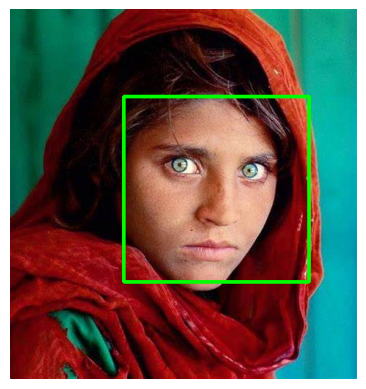

In [38]:
cv.imshow("girl face", girl_image)

girl_detect_rgb = cv.cvtColor(girl_image, cv.COLOR_BGR2RGB)
plt.imshow(girl_detect_rgb)
plt.axis('off')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

## Project 02: Detecting multiple face

### Face Detection of Columbia STS-107 Crew

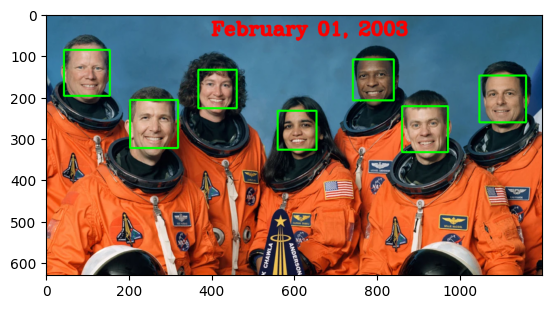

In [46]:
# Step 01: import pre-trained Haar Cascade Classifier for frontal face detection
face_casecade_clf = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# step 02: Load Image
columbia_crew = cv.imread('columbia_crew.webp')

# Step 03: convert to gray scale for better result
columbia_crew_grayImage = cv.cvtColor(src=columbia_crew, code=cv.COLOR_BGR2GRAY)

# Step 04: get the coordinates of the face using the classifier
columbia_crew_faces = face_casecade_clf.detectMultiScale(
    image=columbia_crew_grayImage,
    scaleFactor=1.3,
    minNeighbors=4
)

# Step 05: from the coordiantes, draw the rectange over the face
for x, y, width, height in columbia_crew_faces:
    cv.rectangle(
        img=columbia_crew,
        pt1=(x, y),
        pt2=(x+width, y+height),
        color=(0, 255, 0),
        thickness=3
    )

cv.putText(
    img=columbia_crew, 
    text='February 01, 2003',
    org=(400, 50),
    fontFace=cv.FONT_HERSHEY_COMPLEX,
    fontScale=1.5,
    color=(0, 0, 250),
    thickness=5
)

# Step 06: Display the face detected
cv.imshow('face detections', columbia_crew)

columbia_crew_rgbImage = cv.cvtColor(src=columbia_crew, code=cv.COLOR_BGR2RGB)
plt.imshow(columbia_crew_rgbImage)
# plt.axis("off")
cv.waitKey(0)
cv.destroyAllWindows()


# 02. Face Detection in videos

### 01. webcam face detection:

In [67]:

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
# capture video from webcam
video_input = cv.VideoCapture(0)

while True: 
    ret, frame = video_input.read()
    if not  ret:
        break
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    face_coordinates = face_cascade.detectMultiScale(
        image=gray_frame,
        scaleFactor=1.3,
        minNeighbors=4
    )

    # Draw a rectangle around the found faces cordinateses
    for x, y, width, height in face_coordinates:
        cv.rectangle(
            img=frame,
            pt1=(x, y),
            pt2=(x+width,y+height),
            color=(0, 255, 0),
            thickness=3
        )

    # Display the result
    cv.imshow("realtime face detection", frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
video_input.release()
cv.destroyAllWindows()

### basic Screen Capturing

In [66]:
import cv2

video = cv2.VideoCapture(0)  # Open default camera

while True:
    ret, frame = video.read()
    if not ret:
        break
    
    cv2.imshow('Frame', frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  # Press 'q' to quit
        break
    elif key == ord('s'):  # Press 's' to save
        cv2.imwrite('screenshot.jpg', frame)

video.release()
cv2.destroyAllWindows()
